<a href="https://colab.research.google.com/github/FrozenFalcon-Byte/Improving-DL-Model-Efficiency/blob/main/keras_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [10]:
X = df.iloc[:, :8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [16]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [126]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [31]:
model = Sequential()

In [32]:
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit( X_train, y_train, batch_size = 32,epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4049 - loss: 0.8308 - val_accuracy: 0.5000 - val_loss: 0.7413
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5137 - loss: 0.7383 - val_accuracy: 0.6104 - val_loss: 0.6727
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6133 - loss: 0.6779 - val_accuracy: 0.6818 - val_loss: 0.6223
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6698 - loss: 0.6245 - val_accuracy: 0.7208 - val_loss: 0.5840
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6992 - loss: 0.5922 - val_accuracy: 0.7662 - val_loss: 0.5544
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7582 - loss: 0.5378 - val_accuracy: 0.7792 - val_loss: 0.5321
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7421 - loss: 0.5405 - val_accuracy: 0.8052 - val_loss: 0.5145
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7716 - loss: 0.5130 - val_accuracy: 0.7987 - 

### Using Keras Tuner

In [37]:
#1. appropriate optimizer
#2. no of nodes/layer
#3. no of layer
#4. all in one modelll

In [42]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [56]:
import keras_tuner as kt

In [75]:
# most efficient optimizer
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(1, activation='sigmoid'))

  opti = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'adagrad'])
  model.compile(loss = 'binary_crossentropy', optimizer=opti, metrics=['accuracy'])

  return model

In [76]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10)

Reloading Tuner from ./untitled_project/tuner0.json


In [77]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [78]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [79]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), initial_epoch=6)

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7726 - loss: 0.5276 - val_accuracy: 0.8117 - val_loss: 0.5149
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7623 - loss: 0.5245 - val_accuracy: 0.8182 - val_loss: 0.4998
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7722 - loss: 0.4817 - val_accuracy: 0.8182 - val_loss: 0.4915
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7729 - loss: 0.4768 - val_accuracy: 0.8117 - val_loss: 0.4846
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.4889 - val_accuracy: 0.8117 - val_loss: 0.4795
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7771 - loss: 0.4657 - val_accuracy: 0.8052 - val_loss: 0.4751
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7811 - loss: 0.4485 - val_accuracy: 0.7922 - val_loss: 0.4723
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7959 - loss: 0.4432 - val_accuracy: 0.79

In [110]:
# number of neurons per layer
def build_model(hp):
  model = Sequential()

  neurons = hp.Int('neurons', min_value = 8, max_value = 128)

  model.add(Dense(units=neurons, activation='relu', input_dim=X_train.shape[1]))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [111]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 15,
                        directory='why_I_do_this',
                        project_name='newnew')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
tuner.search(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Trial 15 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 45s


In [113]:
tuner.get_best_hyperparameters()[0].values

{'neurons': 102}

In [114]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [115]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), initial_epoch=6, batch_size=32)

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7509 - loss: 0.5241 - val_accuracy: 0.7792 - val_loss: 0.4845
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7603 - loss: 0.5060 - val_accuracy: 0.7792 - val_loss: 0.4739
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7789 - loss: 0.4714 - val_accuracy: 0.7857 - val_loss: 0.4687
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7889 - loss: 0.4792 - val_accuracy: 0.7857 - val_loss: 0.4663
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7750 - loss: 0.4809 - val_accuracy: 0.7922 - val_loss: 0.4636
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7712 - loss: 0.4696 - val_accuracy: 0.7987 - val_loss: 0.4622
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7749 - loss: 0.4774 - val_accuracy: 0.7987 - val_loss: 0.4622
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7673 - loss: 0.4604 - val_accuracy: 0.78

In [119]:
# number of layers
def build_model(hp):
  model = Sequential()
  model.add(Dense(102, activation='relu', input_dim = 8))

  for i in range(hp.Int('number_Layers', min_value=1, max_value=15)):
    model.add(Dense(102, activation = 'relu'))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [120]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory = 'why_I_do_this',
                        project_name='no_layers')

In [122]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), )

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.8051947951316833

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 49s


In [123]:
tuner.get_best_hyperparameters()[0].values

{'number_Layers': 3}

In [124]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [125]:
model.fit(X_train, y_train, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7924 - loss: 0.4540 - val_accuracy: 0.7792 - val_loss: 0.4973
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8308 - loss: 0.4126 - val_accuracy: 0.7662 - val_loss: 0.4880
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7839 - loss: 0.4547 - val_accuracy: 0.7792 - val_loss: 0.4893
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7795 - loss: 0.4473 - val_accuracy: 0.7792 - val_loss: 0.4723
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7987 - loss: 0.4339 - val_accuracy: 0.7857 - val_loss: 0.4874
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7973 - loss: 0.4345 - val_accuracy: 0.7727 - val_loss: 0.5276
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8110 - loss: 0.4160 - val_accuracy: 0.7922 - val_loss: 0.4820
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 0.4014 - val_accuracy:

In [127]:
def build_model(hp):
  model = Sequential()

  counter = 0
  activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
  for i in range(hp.Int('num_of_layers', min_value = 1, max_value=15)):
    if counter==1:
      model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=128, step=8), activation=activation, input_dim=8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    else:
      model.add(Dense(hp.Int('units'+str(i), min_value=8, max_value=128, step=8), activation=activation))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    counter+=1
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'nadam', 'adadelta']), metrics=['accuracy'])

  return model


In [128]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials = 10,
                        directory = 'why_I_do_this',
                        project_name='final')

In [129]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 01m 40s


In [130]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'tanh',
 'num_of_layers': 7,
 'units0': 80,
 'dropout0': 0.4,
 'optimizer': 'adam',
 'units1': 32,
 'dropout1': 0.2,
 'units2': 8,
 'dropout2': 0.2,
 'units3': 56,
 'dropout3': 0.1,
 'units4': 72,
 'dropout4': 0.9,
 'units5': 120,
 'dropout5': 0.2,
 'units6': 80,
 'dropout6': 0.4,
 'units7': 120,
 'dropout7': 0.9,
 'units8': 8,
 'dropout8': 0.7,
 'units9': 24,
 'dropout9': 0.9,
 'units10': 48,
 'dropout10': 0.8,
 'units11': 120,
 'dropout11': 0.3,
 'units12': 96,
 'dropout12': 0.5,
 'units13': 64,
 'dropout13': 0.6,
 'units14': 80,
 'dropout14': 0.4}

In [132]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [133]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), initial_epoch=6)

Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7363 - loss: 0.5404 - val_accuracy: 0.7922 - val_loss: 0.4744
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.5588 - val_accuracy: 0.7987 - val_loss: 0.4802
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7142 - loss: 0.5738 - val_accuracy: 0.7922 - val_loss: 0.5097
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7290 - loss: 0.5471 - val_accuracy: 0.7792 - val_loss: 0.5172
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7507 - loss: 0.5644 - val_accuracy: 0.7727 - val_loss: 0.5154
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 0.5647 - val_accuracy: 0.7662 - val_loss: 0.5396
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7287 - loss: 0.5679 - val_accuracy: 0.7727 - val_loss: 0.5228
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7449 - loss: 0.5527 - val_accuracy: 0.77

Text(0.5, 0, 'epoch')

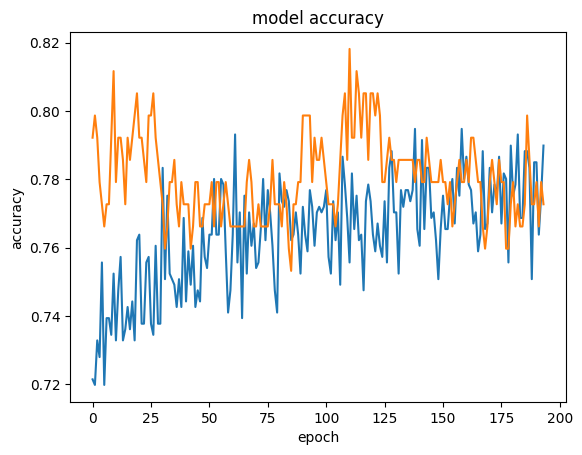

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
# no overfitting !!